In [1]:
# Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('C:/VS CODE/Projects/DR/Wine.csv')
x = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [3]:
#Splitting the dataset into the train set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
# Feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [5]:
# Applying PCA function 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_

In [6]:
# Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [7]:
# Predict the test result
y_pred = classifier.predict(x_test)

In [8]:
# Making the confussion matrix
from sklearn.metrics import confusion_matrix

cn = confusion_matrix(y_test, y_pred)

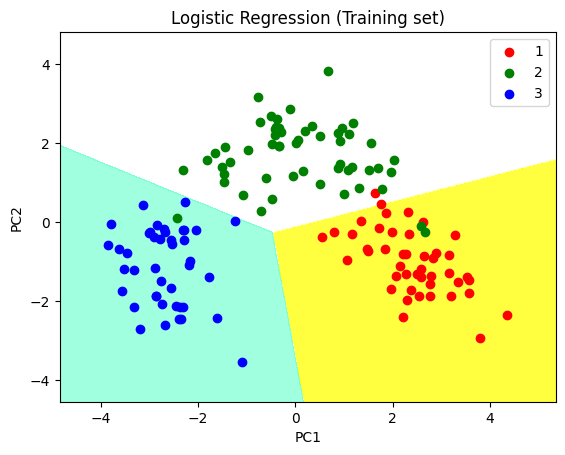

In [9]:
# Predicting the training set result
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                     stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1,
                     stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),
             x2.ravel()]).T).reshape(x1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# Show scatter plot
plt.show()

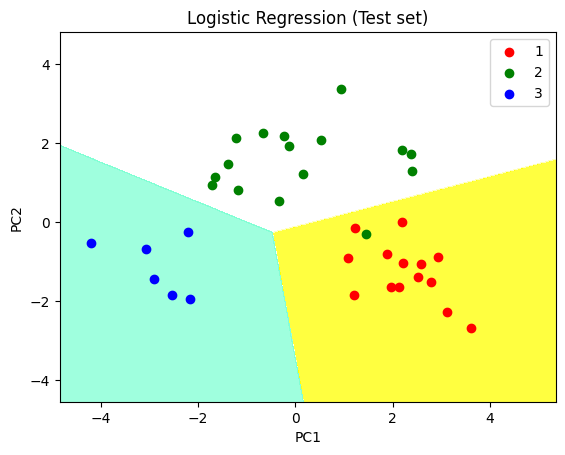

In [10]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test

X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                     stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1,
                     stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),
             x2.ravel()]).T).reshape(x1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# Title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# Show scatter plot
plt.show()